In [1]:
import pandas as pd

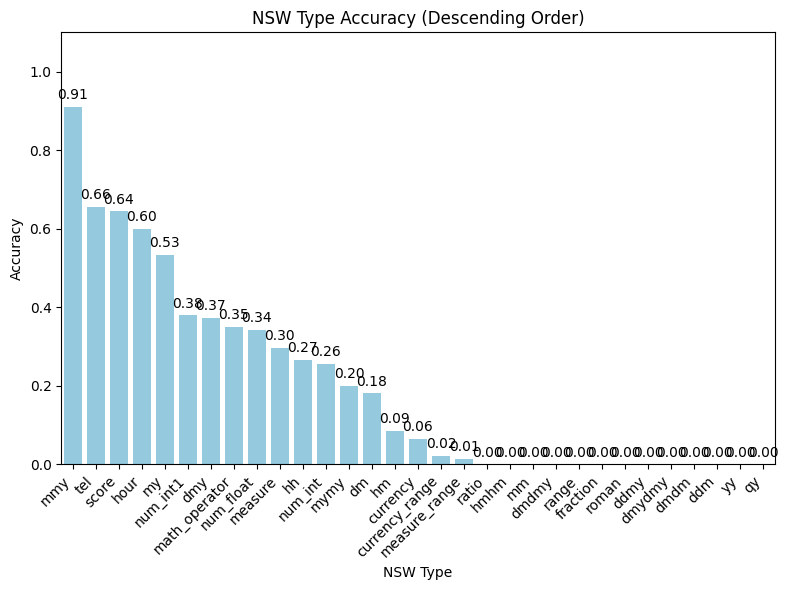

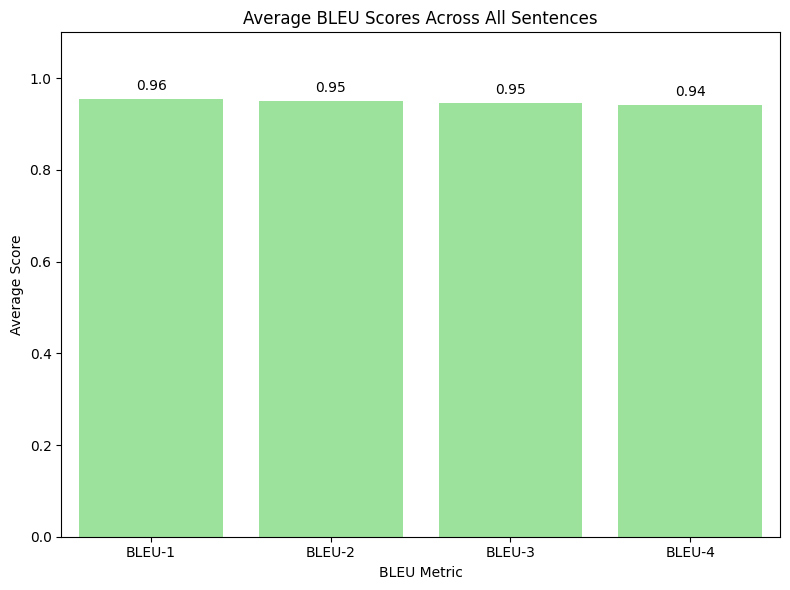


NSW Type Accuracy Statistics:
mmy: 10/11 correct, Accuracy = 0.91
tel: 38/58 correct, Accuracy = 0.66
score: 38/59 correct, Accuracy = 0.64
hour: 6/10 correct, Accuracy = 0.60
my: 39/73 correct, Accuracy = 0.53
num_int1: 55/145 correct, Accuracy = 0.38
dmy: 28/75 correct, Accuracy = 0.37
math_operator: 14/40 correct, Accuracy = 0.35
num_float: 28/82 correct, Accuracy = 0.34
measure: 61/205 correct, Accuracy = 0.30
hh: 13/49 correct, Accuracy = 0.27
num_int: 233/912 correct, Accuracy = 0.26
mymy: 3/15 correct, Accuracy = 0.20
dm: 34/188 correct, Accuracy = 0.18
hm: 5/58 correct, Accuracy = 0.09
currency: 5/78 correct, Accuracy = 0.06
currency_range: 1/47 correct, Accuracy = 0.02
measure_range: 1/68 correct, Accuracy = 0.01
ratio: 0/13 correct, Accuracy = 0.00
hmhm: 0/17 correct, Accuracy = 0.00
mm: 0/10 correct, Accuracy = 0.00
dmdmy: 0/18 correct, Accuracy = 0.00
range: 0/88 correct, Accuracy = 0.00
fraction: 0/40 correct, Accuracy = 0.00
roman: 0/56 correct, Accuracy = 0.00
ddmy: 0/4

In [2]:

import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV (replace with your actual file path)
csv_path = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-15/23:12:56_vinorm_1_eval.csv"  # Update to your CSV path
df = pd.read_csv(csv_path)

# Parse nsw_exact_match strings into dictionaries
df["nsw_exact_match"] = df["nsw_exact_match"].apply(ast.literal_eval)

# Convert BLEU scores to numeric
bleu_cols = ["bleu1", "bleu2", "bleu3", "bleu4"]
for col in bleu_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Compute total correct sentences
total_correct_sentences = df["exact_match"].sum()

# Compute BLEU averages across all sentences
bleu_averages = {f"BLEU-{i+1}": df[f"bleu{i+1}"].mean() for i in range(4)}

# Compute accuracy per NSW type
tag_scores = {}
tag_counts = {}
for nsw_dict in df["nsw_exact_match"]:
    for nsw, [tag, score] in nsw_dict.items():
        tag_scores.setdefault(tag, []).append(score)
        tag_counts.setdefault(tag, 0)
        tag_counts[tag] += 1

# Calculate accuracy for each tag
tag_accuracies = {tag: sum(scores) / len(scores) for tag, scores in tag_scores.items()}

# Convert to DataFrame for NSW accuracy plot
accuracy_df = pd.DataFrame.from_dict(tag_accuracies, orient="index", columns=["Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

# Plot NSW accuracy bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=accuracy_df.index, y=accuracy_df["Accuracy"], color="skyblue")
plt.title("NSW Type Accuracy (Descending Order)")
plt.xlabel("NSW Type")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
plt.xticks(rotation=45, ha="right")
for i, v in enumerate(accuracy_df["Accuracy"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
plt.tight_layout()
plt.savefig("nsw_accuracy_barchart.png", dpi=300, bbox_inches="tight")
plt.show()

# Convert BLEU averages to DataFrame for plot
bleu_df = pd.DataFrame.from_dict(bleu_averages, orient="index", columns=["Average BLEU"])

# Plot BLEU averages bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=bleu_df.index, y=bleu_df["Average BLEU"], color="lightgreen")
plt.title("Average BLEU Scores Across All Sentences")
plt.xlabel("BLEU Metric")
plt.ylabel("Average Score")
plt.ylim(0, 1.1)
for i, v in enumerate(bleu_df["Average BLEU"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
plt.tight_layout()
# plt.savefig("bleu_averages_barchart.png", dpi=300, bbox_inches="tight")
plt.show()

# Print statistics
print("\nNSW Type Accuracy Statistics:")
for tag in accuracy_df.index:
    accuracy = tag_accuracies[tag]
    correct = sum(tag_scores[tag])
    total = tag_counts[tag]
    print(f"{tag}: {correct}/{total} correct, Accuracy = {accuracy:.2f}")

print("\nBLEU Score Averages:")
for bleu_metric, avg in bleu_averages.items():
    print(f"{bleu_metric}: {avg:.2f}")

print(f"\nTotal Correct Sentences: {total_correct_sentences}/{len(df)}")


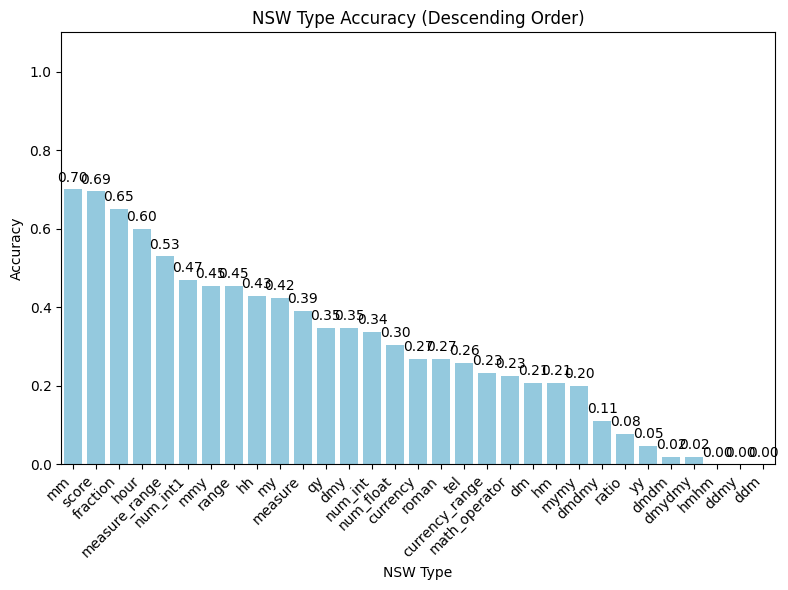

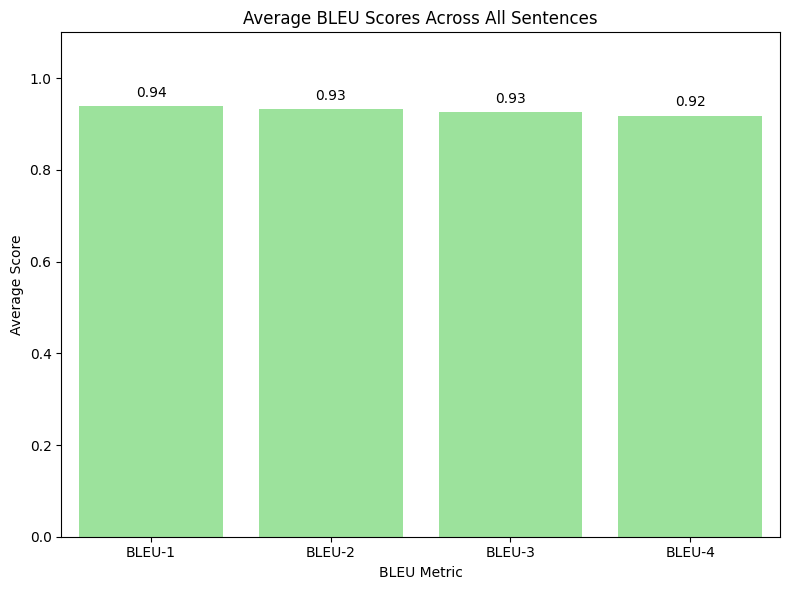


NSW Type Accuracy Statistics:
mm: 7/10 correct, Accuracy = 0.70
score: 41/59 correct, Accuracy = 0.69
fraction: 26/40 correct, Accuracy = 0.65
hour: 6/10 correct, Accuracy = 0.60
measure_range: 36/68 correct, Accuracy = 0.53
num_int1: 68/145 correct, Accuracy = 0.47
mmy: 5/11 correct, Accuracy = 0.45
range: 40/88 correct, Accuracy = 0.45
hh: 21/49 correct, Accuracy = 0.43
my: 31/73 correct, Accuracy = 0.42
measure: 80/205 correct, Accuracy = 0.39
qy: 17/49 correct, Accuracy = 0.35
dmy: 26/75 correct, Accuracy = 0.35
num_int: 308/912 correct, Accuracy = 0.34
num_float: 25/82 correct, Accuracy = 0.30
currency: 21/78 correct, Accuracy = 0.27
roman: 15/56 correct, Accuracy = 0.27
tel: 15/58 correct, Accuracy = 0.26
currency_range: 11/47 correct, Accuracy = 0.23
math_operator: 9/40 correct, Accuracy = 0.23
dm: 39/188 correct, Accuracy = 0.21
hm: 12/58 correct, Accuracy = 0.21
mymy: 3/15 correct, Accuracy = 0.20
dmdmy: 2/18 correct, Accuracy = 0.11
ratio: 1/13 correct, Accuracy = 0.08
yy: 2

In [5]:

import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV (replace with your actual file path)
csv_path = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-17/11:14:28_gpt-4o-mini_1_eval.csv"  # Update to your CSV path
df = pd.read_csv(csv_path)

# Parse nsw_exact_match strings into dictionaries
df["nsw_exact_match"] = df["nsw_exact_match"].apply(ast.literal_eval)

# Convert BLEU scores to numeric
bleu_cols = ["bleu1", "bleu2", "bleu3", "bleu4"]
for col in bleu_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Compute total correct sentences
total_correct_sentences = df["exact_match"].sum()

# Compute BLEU averages across all sentences
bleu_averages = {f"BLEU-{i+1}": df[f"bleu{i+1}"].mean() for i in range(4)}

# Compute accuracy per NSW type
tag_scores = {}
tag_counts = {}
for nsw_dict in df["nsw_exact_match"]:
    for nsw, [tag, score] in nsw_dict.items():
        tag_scores.setdefault(tag, []).append(score)
        tag_counts.setdefault(tag, 0)
        tag_counts[tag] += 1

# Calculate accuracy for each tag
tag_accuracies = {tag: sum(scores) / len(scores) for tag, scores in tag_scores.items()}

# Convert to DataFrame for NSW accuracy plot
accuracy_df = pd.DataFrame.from_dict(tag_accuracies, orient="index", columns=["Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

# Plot NSW accuracy bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=accuracy_df.index, y=accuracy_df["Accuracy"], color="skyblue")
plt.title("NSW Type Accuracy (Descending Order)")
plt.xlabel("NSW Type")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
plt.xticks(rotation=45, ha="right")
for i, v in enumerate(accuracy_df["Accuracy"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
plt.tight_layout()
plt.savefig("nsw_accuracy_barchart.png", dpi=300, bbox_inches="tight")
plt.show()

# Convert BLEU averages to DataFrame for plot
bleu_df = pd.DataFrame.from_dict(bleu_averages, orient="index", columns=["Average BLEU"])

# Plot BLEU averages bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=bleu_df.index, y=bleu_df["Average BLEU"], color="lightgreen")
plt.title("Average BLEU Scores Across All Sentences")
plt.xlabel("BLEU Metric")
plt.ylabel("Average Score")
plt.ylim(0, 1.1)
for i, v in enumerate(bleu_df["Average BLEU"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
plt.tight_layout()
# plt.savefig("bleu_averages_barchart.png", dpi=300, bbox_inches="tight")
plt.show()

# Print statistics
print("\nNSW Type Accuracy Statistics:")
for tag in accuracy_df.index:
    accuracy = tag_accuracies[tag]
    correct = sum(tag_scores[tag])
    total = tag_counts[tag]
    print(f"{tag}: {correct}/{total} correct, Accuracy = {accuracy:.2f}")

print("\nBLEU Score Averages:")
for bleu_metric, avg in bleu_averages.items():
    print(f"{bleu_metric}: {avg:.2f}")

print(f"\nTotal Correct Sentences: {total_correct_sentences}/{len(df)}")
